## Web page processing

Count the number of 'C++' on page

In [1]:
import requests

res = requests.get('https://ru.wikipedia.org/wiki/Python')
print(res.text.count('C++'))

18


Мы сохранили страницу с википедии про языки программирования и сохранили по адресу https://stepik.org/media/attachments/lesson/209717/1.html

Скачайте её с помощью скрипта на Питоне и посчитайте, какой язык упоминается чаще Python или C++ (ответ должен быть одной из этих двух строк).

In [4]:
import requests

res = requests.get('https://stepik.org/media/attachments/lesson/209717/1.html')
print('C++' if res.text.count('C++') > res.text.count('Python') else 'Python')

C++


Посчитать те, которые вне тегов - только текст

In [5]:
import requests

res = requests.get('https://stepik.org/media/attachments/lesson/209717/1.html')

s = res.text
ans = ''
# state 0 - находмся вне тега, 1 - внутри тега
state = 0 

for c in s:
    if c == '<':
        state = 1
    if c == '>':
        state = 0
    elif state == 0:
        ans += c
        
print(ans.count('C++'))

9


Файл https://stepik.org/media/attachments/lesson/209719/2.html содержит статью с Википедии про язык Python. В этой статье есть теги code, которыми выделяются конструкции на языке Python. Вам нужно найти все строки, содержащиеся между тегами <code> и </code> и найти те строки, которые встречаются чаще всего и вывести их в алфавитном порядке, разделяя пробелами.

Например, если исходный текст страницы выглядел бы так:

<code>a</code>
<a>bracadabr</a>
<code>c</code>
<code>b</code>
<code>b</code>
<code>c</code>
то в ответ надо было бы ввести строку "b c".

In [33]:
import re
import requests
import collections

res = requests.get('https://stepik.org/media/attachments/lesson/209719/2.html')
pattern = r'<code>(.*?)</code>'
s = re.findall(pattern, res.text)
count = collections.Counter(s).most_common()

if len(count) > 0:
    s = count[0][0]
    c = count[0][1]

for i in range(1, len(count)):
    if count[i-1][1] > count[i][1]:
        break
    else:
        s += ' ' + count[i][0]

print(s)


else except finally


**модуль BeautifulSoup**

In [51]:
from bs4 import BeautifulSoup
import requests

res = requests.get('http://dataquestio.github.io/web-scraping-pages/simple.html')
print(res.status_code)
print(res.content)
print('------')

soup = BeautifulSoup(res.content, 'html.parser')
print(soup.prettify())
print('------')

html = list(soup.children)[2]
print(html)
print('------')

print(list(html.children))

print('------ нати все <p>') 
print(soup.find_all('p'))
print(soup.find_all('p')[0].get_text())

200
b'<!DOCTYPE html>\n<html>\n    <head>\n        <title>A simple example page</title>\n    </head>\n    <body>\n        <p>Here is some simple content for this page.</p>\n    </body>\n</html>'
------
<!DOCTYPE html>
<html>
 <head>
  <title>
   A simple example page
  </title>
 </head>
 <body>
  <p>
   Here is some simple content for this page.
  </p>
 </body>
</html>
------
<html>
<head>
<title>A simple example page</title>
</head>
<body>
<p>Here is some simple content for this page.</p>
</body>
</html>
------
['\n', <head>
<title>A simple example page</title>
</head>, '\n', <body>
<p>Here is some simple content for this page.</p>
</body>, '\n']
------ нати все <p>
[<p>Here is some simple content for this page.</p>]
Here is some simple content for this page.


In [52]:
from urllib.request import urlopen, urlretrieve
from bs4 import BeautifulSoup

resp = urlopen('https://stepik.org/media/attachments/lesson/245130/6.html') # скачиваем файл
html = resp.read().decode('utf8') # считываем содержимое
soup = BeautifulSoup(html, 'html.parser') # делаем суп
table = soup.find('table', attrs = {'class' : 'wikitable sortable'})
cnt = 0
for tr in soup.find_all('tr'):
    cnt += 1
    for td in tr.find_all(['td', 'th']):
        cnt *= 2
print(cnt)

94596065609609271052308


В файле https://stepik.org/media/attachments/lesson/209723/3.html находится одна таблица. Просуммируйте все числа в ней и введите в качестве ответа одно число - эту сумму. Для доступа к ячейкам используйте возможности BeautifulSoup.

In [67]:
from bs4 import BeautifulSoup
import requests

res = requests.get('https://stepik.org/media/attachments/lesson/209723/3.html')
soup = BeautifulSoup(res.content, 'html.parser')

table = [int(td.get_text().strip()) for td in soup.find_all('td')]

print(sum(table))

1005425


В файле https://stepik.org/media/attachments/lesson/209723/4.html находится одна таблица. Просуммируйте все числа в ней. Теперь мы добавили разных тегов для изменения стиля отображения. Для доступа к ячейкам используйте возможности BeautifulSoup.

In [72]:
from bs4 import BeautifulSoup
import requests

res = requests.get('https://stepik.org/media/attachments/lesson/209723/4.html')
soup = BeautifulSoup(res.content, 'html.parser')

table = [int(td.get_text().strip()) for td in soup.find_all('td')]

print(sum(table))

29536


В файле https://stepik.org/media/attachments/lesson/209723/5.html находится одна таблица. Просуммируйте все числа в ней. Теперь мы не только добавили разных тегов для изменения стиля отображения, но и сделали невалидный HTML-код (правда, браузеры его отображают, а вот с BeautifulSoup могут быть проблемы). Невалидный HTML-код - не редкость в интернете, надо учиться работать и с этим.

Вы можете исправить html-код или попробовать использовать нестандартный парсер html, такой как html5lib.

In [73]:
from bs4 import BeautifulSoup
import requests

res = requests.get('https://stepik.org/media/attachments/lesson/209723/5.html')
soup = BeautifulSoup(res.content, 'html.parser')

table = [int(td.get_text().strip()) for td in soup.find_all('td')]

print(sum(table))

28734


## Электронные таблицы

Для решения этой задачи необходимо установить библиотеку xlrd, скачать файл https://stepik.org/media/attachments/lesson/245266/tab.xlsx и создать в папке с этим файлом скрипт со следующем содержанием:

In [74]:
import xlrd

wb = xlrd.open_workbook('tab.xlsx')
sheet_names = wb.sheet_names()
sh = wb.sheet_by_name(sheet_names[0])
nmin = sh.row_values(6)[2]
for rownum in range(7, 27):
    temp = sh.row_values(rownum)
    nmin = min(nmin, temp[2])
print(nmin)

39650.2


Вася планирует карьеру и переезд. Для это составил таблицу, в которой для каждого региона записал зарплаты для разных интересные ему профессий. Таблица доступна по ссылке https://stepik.org/media/attachments/lesson/245267/salaries.xlsx. Выведите название региона с самой высокой медианной зарплатой (медианой называется элемент, стоящий в середине массива после его упорядочивания) и, через пробел, название профессии с самой высокой средней зарплатой по всем регионам. 

In [84]:
import xlrd
import requests

res = requests.get('https://stepik.org/media/attachments/lesson/245267/salaries.xlsx')
file = xlrd.open_workbook(file_contents=res.content)
page = file.sheet_by_index(0)

max_median = 0
max_median_region = ''
for i in range(1, page.nrows):    
    median = sorted(page.row_values(i)[1:])
    median = median[len(median)//2]
    if median > max_median:
        max_median = median
        max_median_region = page.row_values(i)[0]
print(max_median_region, end=' ')

max_avg = 0
max_avg_profession = ''
for i in range(1, page.ncols):    
    avg = page.col_values(i)[1:]
    avg = sum(avg)/len(avg)
    if avg > max_avg:
        max_avg = avg
        max_avg_profession = page.col_values(i)[0]
print(max_avg_profession)


Куала-Лумпур Собачий парикмахер


то же самое через pandas

In [87]:
import pandas as pd

data = pd.read_excel('https://stepik.org/media/attachments/lesson/245267/salaries.xlsx', index_col=0)
print(data.median(axis=1).idxmax(), data.mean(axis=0).idxmax())

Куала-Лумпур Собачий парикмахер


Васю назначили завхозом в туристической группе и он подошёл к подготовке ответственно, составив справочник продуктов с указанием калорийности на 100 грамм, а также содержание белков, жиров и углеводов на 100 грамм продукта. Ему не удалось найти всю информацию, поэтому некоторые ячейки остались незаполненными (можно считать их значение равным нулю). Также он использовал какой-то странный офисный пакет и разделял целую и дробную часть чисел запятой. Таблица доступна по ссылке https://stepik.org/media/attachments/lesson/245290/trekking1.xlsx

Вася хочет минимизировать вес продуктов и для этого брать самые калорийные продукты. Помогите ему и упорядочите продукты по убыванию калорийности. В случае, если продукты имеют одинаковую калорийность - упорядочите их по названию. В качестве ответа необходимо сдать названия продуктов, по одному в строке.

In [102]:
import xlrd
import requests

res = requests.get('https://stepik.org/media/attachments/lesson/245290/trekking1.xlsx')
file = xlrd.open_workbook(file_contents=res.content)
page = file.sheet_by_index(0)

d = {}
for i in range(1, page.nrows):
    if page.row_values(i)[0] not in d:
        d[page.row_values(i)[0]] = page.row_values(i)[1]

d_sort = sorted(d.items(), key=lambda x: (-x[1], x[0]))

with open('answer.txt', 'w') as ans:
    for elem in d_sort:
        ans.write(elem[0].strip()+'\n')

Васю назначили завхозом в туристической группе и он подошёл к подготовке ответственно, составив справочник продуктов с указанием калорийности на 100 грамм, а также содержание белков, жиров и углеводов на 100 грамм продукта. Ему не удалось найти всю информацию, поэтому некоторые ячейки остались незаполненными (можно считать их значение равным нулю). Также он использовал какой-то странный офисный пакет и разделял целую и дробную часть чисел запятой. Таблица доступна по ссылке https://stepik.org/media/attachments/lesson/245290/trekking2.xlsx 

Вася составил раскладку по продуктам на один день (она на листе "Раскладка") с указанием названия продукта и его количества в граммах. Посчитайте 4 числа: суммарную калорийность и граммы белков, жиров и углеводов. Числа округлите до целых вниз и введите через пробел.

In [148]:
import xlrd
import requests

res = requests.get('https://stepik.org/media/attachments/lesson/245290/trekking2.xlsx')
file = xlrd.open_workbook(file_contents=res.content)
products = file.sheet_by_name('Справочник')
day_norm = file.sheet_by_name('Раскладка')

row = -1
calories = .0
proteins = .0
fats = .0
carbons = .0

for row_num in range(1, day_norm.nrows):
    product = day_norm.row_values(row_num)[0]
    gramm = float(day_norm.row_values(row_num)[1])
    if product in products.col_values(0, start_rowx=1):
        row = products.col_values(0).index(product)
        calories += (float(products.col_values(1)[row]) * gramm / 100) if products.col_values(1)[row] !='' else 0
        proteins += (float(products.col_values(2)[row]) * gramm / 100) if products.col_values(2)[row] !='' else 0
        fats += (float(products.col_values(3)[row]) * gramm / 100) if products.col_values(3)[row] !='' else 0
        carbons += (float(products.col_values(4)[row]) * gramm / 100) if products.col_values(4)[row] !='' else 0

print(int(calories), int(proteins), int(fats), int(carbons))

4963 203 307 302


Васю назначили завхозом в туристической группе и он подошёл к подготовке ответственно, составив справочник продуктов с указанием калорийности на 100 грамм, а также содержание белков, жиров и углеводов на 100 грамм продукта. Ему не удалось найти всю информацию, поэтому некоторые ячейки остались незаполненными (можно считать их значение равным нулю). Также он использовал какой-то странный офисный пакет и разделял целую и дробную часть чисел запятой. Таблица доступна по ссылке https://stepik.org/media/attachments/lesson/245290/trekking3.xlsx

Вася составил раскладку по продуктам на весь поход (она на листе "Раскладка") с указанием номера дня, названия продукта и его количества в граммах. Для каждого дня посчитайте 4 числа: суммарную калорийность и граммы белков, жиров и углеводов. Числа округлите до целых вниз и введите через пробел. Информация о каждом дне должна выводиться в отдельной строке.

In [152]:
import xlrd
import requests

res = requests.get('https://stepik.org/media/attachments/lesson/245290/trekking3.xlsx')
file = xlrd.open_workbook(file_contents=res.content)
products = file.sheet_by_name('Справочник')
day_norm = file.sheet_by_name('Раскладка')

row = -1
calories = .0
proteins = .0
fats = .0
carbons = .0

days = set([int(i) for i in day_norm.col_values(0, start_rowx=1)])
for d in days:
    row = -1
    calories = .0
    proteins = .0
    fats = .0
    carbons = .0
    for row_num in range(1, day_norm.nrows):
        if day_norm.row_values(row_num)[0] != d:
            continue
        product = day_norm.row_values(row_num)[1]
        gramm = float(day_norm.row_values(row_num)[2])
        if product in products.col_values(0, start_rowx=1):
            row = products.col_values(0).index(product)
            calories += (float(products.col_values(1)[row]) * gramm / 100) if products.col_values(1)[row] !='' else 0
            proteins += (float(products.col_values(2)[row]) * gramm / 100) if products.col_values(2)[row] !='' else 0
            fats += (float(products.col_values(3)[row]) * gramm / 100) if products.col_values(3)[row] !='' else 0
            carbons += (float(products.col_values(4)[row]) * gramm / 100) if products.col_values(4)[row] !='' else 0

    print(int(calories), int(proteins), int(fats), int(carbons))

2405 82 154 172
4963 203 307 302
5219 178 267 502
4873 241 204 537
5278 243 314 367
4451 190 188 497
4806 205 265 386
5738 264 195 720
1766 66 90 171


Главный бухгалтер компании "Рога и копыта" случайно удалил ведомость с начисленной зарплатой. К счастью, у него сохранились расчётные листки всех сотрудников. Помогите по этим расчётным листкам восстановить зарплатную ведомость. Архив с расчётными листками доступен по ссылке https://stepik.org/media/attachments/lesson/245299/rogaikopyta.zip (вы можете скачать и распаковать его вручную или самостоятельно научиться делать это с помощью скрипта на Питоне).

Ведомость должна содержать 1000 строк, в каждой строке должно быть указано ФИО сотрудника и, через пробел, его зарплата. Сотрудники должны быть упорядочены по алфавиту.

In [174]:
import os
import xlrd

wd =  os.path.split(os.getcwd())[1]
if wd != 'rogaikopyta':
    os.chdir('rogaikopyta')

dic = {}

for d, dirs, files in os.walk(os.getcwd()):
    for f in files:
        file = xlrd.open_workbook(f)
        sheet = file.sheet_by_index(0)
        if sheet.col_values(1)[1] not in dic:
            dic[sheet.col_values(1)[1]] = int(sheet.col_values(3)[1])

with open('../answer.txt', 'w') as f:
    for key in sorted(dic):
        f.write(key + ' ' + str(dic[key]) + '\n')
    

os.chdir('..')

## XML и работа с Open Street Map

В этой задаче нужно просто установить библиотеку xmltodict, скачать файл https://stepik.org/media/attachments/lesson/245571/map1.osm, создать в директории с файлом скрипт со следующим содержанием:

In [177]:
import xmltodict

fin = open('map1.osm', 'r', encoding='utf8')
xml = fin.read()
fin.close()

parsedxml = xmltodict.parse(xml)
print(parsedxml['osm']['node'][100]['@id'])

296932122


В OpenStreetMap XML встречаются теги node, которые соответствуют некоторым точкам на карте. Ноды могут не только обозначать какой-то точечный объект, но и входить в состав way (некоторой линии, возможно замкнутой) и не иметь собственных тегов. Для доступного по ссылке https://stepik.org/media/attachments/lesson/245678/map1.osm фрагмента карты посчитайте, сколько node имеет хотя бы один вложенный тэг tag, а сколько - не имеют. В качестве ответа введите два числа, разделённых пробелом.

In [185]:
import xmltodict

with open('map1.osm') as f:
    xml = f.read()
    
xml = xmltodict.parse(xml)
counter_yes = 0
counter_no = 0

for i in range(len(xml['osm']['node'])):
    if 'tag' in xml['osm']['node'][i]:
        counter_yes += 1
    else:
        counter_no += 1
        
print(counter_yes, counter_no)

316 6166


Вася решил открыть АЗС (заправку). Чтобы оценить уровень конкуренции он хочет изучить количество заправок в интересующем его районе. Вася скачал интересующий его кусок карты OSM https://stepik.org/media/attachments/lesson/245681/map2.osm и хочет посчитать, сколько на нём отмечено точечных объектов (node), являющихся заправкой. В качестве ответа вам необходимо вывести одно число - количество АЗС.

"Как обозначается заправка в OpenStreetMap" - пример хорошего запроса чтобы узнать, как обозначается заправка в OpenStreetMap.

In [217]:
import xmltodict

with open('map2.osm') as f:
    xml = f.read()
    
xml = xmltodict.parse(xml)
counter = 0

for node in xml['osm']['node']:
    if 'tag' in node:
        tags = node['tag']
        if isinstance(tags, list):
            for tag in tags:
                if '@k' in tag and '@v' in tag and tag['@k'] == 'amenity' and tag['@v'] == 'fuel':
                    counter += 1
        elif isinstance(tags,dict):
            if (tags['@v'])=='fuel':
                counter += 1
        
print(counter)


27


вариант без танцев с бубнами

In [216]:
import xml.etree.ElementTree as ET

root = ET.parse('map2.osm').getroot()
nodes = root.findall("./node/tag[@k='amenity'][@v='fuel']")
print(len(nodes))

15


Вася, открывший заправку в прошлом уроке, разорился. Конкуренция оказалась слишком большой. Вася предполагает, что это произошло от того, что теги заправки могут быть не только на точке, но и на каком-то контуре. Определите, сколько заправок на самом деле (не только обозначенных точкой) есть на фрагменте карты https://stepik.org/media/attachments/lesson/245681/map2.osm

In [218]:
import xmltodict

with open('map2.osm') as f:
    xml = f.read()
    
xml = xmltodict.parse(xml)
counter = 0

for node in xml['osm']['node']:
    if 'tag' in node:
        tags = node['tag']
        if isinstance(tags, list):
            for tag in tags:
                if '@k' in tag and '@v' in tag and tag['@k'] == 'amenity' and tag['@v'] == 'fuel':
                    counter += 1
        elif isinstance(tags,dict):
            if (tags['@v'])=='fuel':
                counter += 1
        
for node in xml['osm']['way']:
    if 'tag' in node:
        tags = node['tag']
        if isinstance(tags, list):
            for tag in tags:
                if '@k' in tag and '@v' in tag and tag['@k'] == 'amenity' and tag['@v'] == 'fuel':
                    counter += 1
        elif isinstance(tags,dict):
            if (tags['@v'])=='fuel':
                counter += 1

print(counter)


27


In [221]:
import xml.etree.ElementTree as ET

root = ET.parse('map2.osm').getroot()
nodes = root.findall("./node/tag[@k='amenity'][@v='fuel']")
nodes += root.findall("./way/tag[@k='amenity'][@v='fuel']")

print(len(nodes))

27


In [222]:
with open('map2.osm', 'r', encoding='utf8') as f:
    print(sum('v="fuel"' in v for v in f))

27


## Построение графиков с pyplot

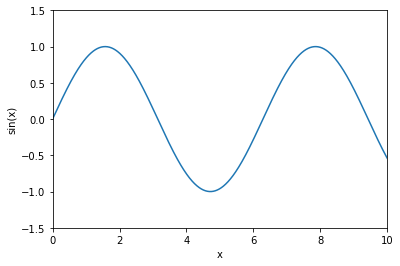

In [224]:
import matplotlib.pyplot as plt # подключаем библиотеку с коротким названием, чтобы не писать каждый раз много букв
import math

fig = plt.figure() # создаем график

plt.axis([0, 10, -1.5, 1.5]) # на оси x будет изображаться участок от 0 до 10, а на оси y от -1.5 до 1.5

plt.xlabel('x') # подпись оси x
plt.ylabel('sin(x)') # подпись оси y

xs = [] # здесь будут параметры функции (x координаты изображаемых точек)
sin_vals = [] # здесь будут значения функции (y координаты изображаемых точек)

x = 0.0
while x < 10.0: # заполняем списки
    sin_vals.append(math.sin(x))
    xs.append(x)
    x += 0.01

plt.plot(xs, sin_vals) # создаем график: первый аргумент - список x-координат, второй - соответствующие y-координаты

fig.savefig('sin.png') # сохраняем график в файл
#plt.show()

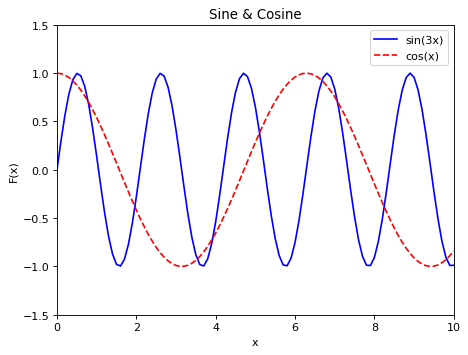

In [225]:
#!/usr/bin/env python3

import matplotlib as mpl
import matplotlib.pyplot as plt
import math

dpi = 80
fig = plt.figure(dpi = dpi, figsize = (512 / dpi, 384 / dpi) )
mpl.rcParams.update({'font.size': 10})

plt.axis([0, 10, -1.5, 1.5])

plt.title('Sine & Cosine')
plt.xlabel('x')
plt.ylabel('F(x)')

xs = []
sin_vals = []
cos_vals = []

x = 0.0
while x < 10.0:
    sin_vals += [ math.sin(3 * x) ]
    cos_vals += [ math.cos(x) ]
    xs += [x]
    x += 0.1

plt.plot(xs, sin_vals, color = 'blue', linestyle = 'solid',
         label = 'sin(3x)')
plt.plot(xs, cos_vals, color = 'red', linestyle = 'dashed',
         label = 'cos(x)')

plt.legend(loc = 'upper right')
fig.savefig('trigan.png')

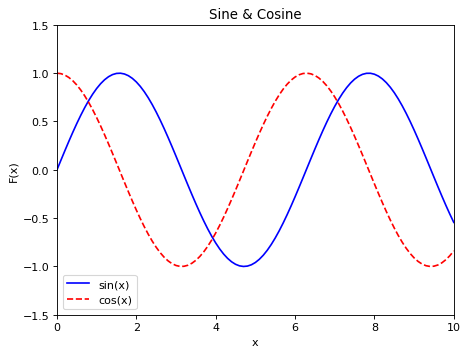

In [228]:
#!/usr/bin/env python3
# vim: set ai et ts=4 sw=4:

import matplotlib as mpl
import matplotlib.pyplot as plt
import math

dpi = 80
fig = plt.figure(dpi = dpi, figsize = (512 / dpi, 384 / dpi) )
mpl.rcParams.update({'font.size': 10})

plt.axis([0, 10, -1.5, 1.5])

plt.title('Sine & Cosine')
plt.xlabel('x')
plt.ylabel('F(x)')

xs = []
sin_vals = []
cos_vals = []

x = 0.0
while x < 10.0:
    sin_vals += [ math.sin(x) ]
    cos_vals += [ math.cos(x) ]
    xs += [x]
    x += 0.1

plt.plot(xs, sin_vals, color = 'blue', linestyle = 'solid',
         label = 'sin(x)')
plt.plot(xs, cos_vals, color = 'red', linestyle = 'dashed',
         label = 'cos(x)')

plt.legend(loc = 'lower left')
fig.savefig('trigan.png')

/Users/natasha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


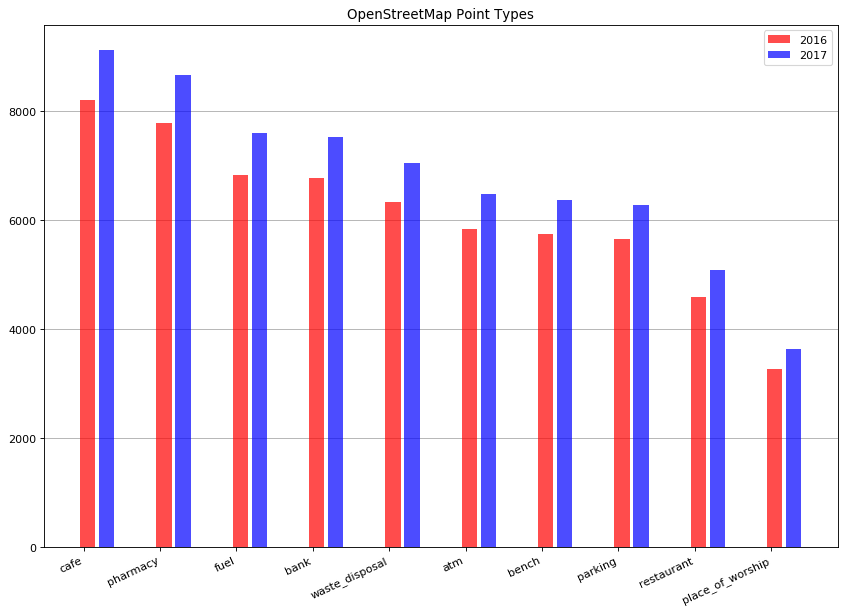

In [230]:
#!/usr/bin/env python3
# vim: set ai et ts=4 sw=4:

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import csv

data_names = ['cafe', 'pharmacy', 'fuel', 'bank', 'waste_disposal',
              'atm', 'bench', 'parking', 'restaurant',
              'place_of_worship']
data_values = [9124, 8652, 7592, 7515, 7041, 6487, 6374, 6277,
               5092, 3629]

dpi = 80
fig = plt.figure(dpi = dpi, figsize = (1024 / dpi, 768 / dpi) )
mpl.rcParams.update({'font.size': 10})

plt.title('OpenStreetMap Point Types')

ax = plt.axes()
ax.yaxis.grid(True, zorder = 1)

xs = range(len(data_names))

plt.bar([x + 0.05 for x in xs], [ d * 0.9 for d in data_values],
        width = 0.2, color = 'red', alpha = 0.7, label = '2016',
        zorder = 2)
plt.bar([x + 0.3 for x in xs], data_values,
        width = 0.2, color = 'blue', alpha = 0.7, label = '2017',
        zorder = 2)
plt.xticks(xs, data_names)

fig.autofmt_xdate(rotation = 25)

plt.legend(loc='upper right')
fig.savefig('bars.png')

В этой задаче вам необходимо научиться генерировать html-код на питоне и сдать на проверку html-файл, в котором будет таблица размером 10 на 10, которая должна содержать таблицу умножения для чисел от 1 до 10. При открытии вашего файла в браузере это должно выглядеть примерно так:

In [234]:
with open('answer.html', 'w') as f:
    f.write('<html><body><table>\n')
    for i in range(1, 11):
        s = '<tr>'
        for j in range(1, 11):
            s += f'<td>{i * j}</td>'
        f.write(s + '</tr>\n')
    f.write('</table></body></html>')

В этой задаче вам предстоит научиться создавать ссылки. Вам нужно сгенерировать html-код на питоне и сдать на проверку html-файл, в котором будет таблица размером 10 на 10, которая должна содержать таблицу умножения для чисел от 1 до 10. Каждое число в таблице должно быть ссылкой на страницу http://<это число>.ru. Например, число 12 должно быть ссылкой на страницу http://12.ru

In [235]:
with open('answer.html', 'w') as f:
    f.write('<html><body><table>\n')
    for i in range(1, 11):
        s = '<tr>'
        for j in range(1, 11):
            s += f'<td><a href=http://{i * j}.ru>{i*j}</a></td>'
        f.write(s + '</tr>\n')
    f.write('</table></body></html>')

В этой задаче вам предстоит настроить и запустить веб-сервер. Создайте файл index.html с формой, в которой есть единственное текстовое поле ввода с именем INPUT_TEXT и кнопка отправить.

В папке cgi-bin создайте скрипт со следующим содержанием:

Запустите скрипт, поднимающий веб-сервер с вашей формой, откройте страницу и введите слово Python (обязательно с большой буквы). У вас должна открыться страница, содержащая единственное число, введите его в качестве ответа.

In [238]:
#!/usr/bin/env python3
import cgi

def ohash(s):
    ans = 0
    for c in s:
        ans = ans * 123417 + ord(c)
    return ans

form = cgi.FieldStorage()
text = form.getfirst("INPUT_TEXT", "не задано")

print("Content-type: text/html\n")
print("""<!DOCTYPE HTML>
        <html>
        <head>
            <meta charset="utf-8">
        </head>
        <body>""")

print("<h1>" + str(ohash(text)) + "</h1>")

print("""</body>
        </html>""")

Content-type: text/html

<!DOCTYPE HTML>
        <html>
        <head>
            <meta charset="utf-8">
        </head>
        <body>
<h1>58402725469969025762522153529653374008565056</h1>
</body>
        </html>


In [237]:
def ohash(s):
    ans = 0
    for c in s:
        ans = ans * 123417 + ord(c)
    return ans

print(str(ohash('Python')))

2290710658703611189398393962


**ВАЖНО!!** запуск встроенного web-сервера
```
python3 -m http.server --cgi
```

В этой задаче вам предстоит настроить и запустить веб-сервер, а также обнаружить проблему в скрипте, обрабатывающем данные формы. Создайте файл index.html с формой, в которой есть единственное текстовое поле ввода с именем INPUT_TEXT и кнопка отправить.

В папке cgi-bin создайте скрипт со следующим содержанием:

In [ ]:
#!/usr/bin/env python3
import cgi

form = cgi.FieldStorage()
text = form.getfirst("INPUT_TEXT", "не задано")
text = text[:-1]

print("Content-type: text/html\n")
print("""<!DOCTYPE HTML>
        <html>
        <head>
            <meta charset="utf-8">
        </head>
        <body>""")
		
for i in range(1, len(text) + 1, 2):
	print("<h1>" + str(hash(text[i])) + "</h1>")

print("""</body>
        </html>""")

Запустите скрипт, поднимающий веб-сервер с вашей формой, откройте страницу и введите слово Python (обязательно с большой буквы). У вас должна открыться страница, содержащая несколько чисел. Однако, если вы откроете ее исходный текст, то обнаружите, что она обрывается без закрытия некоторых тегов, а это значит, что что-то пошло не так.

Поймите, где искать сообщение об ошибке и в качестве ответа введите номер строки, в которой произошла ошибка.

17 строка - выход за границы диапазона